In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
def null_degerler(play):
    null_df=pd.DataFrame()
    null_df['yüzde']=df.isnull().sum()*100/df.shape[0]
    null_df['adet']=df.isnull().sum()
    return null_df.sort_values('yüzde',ascending=False)
null_degerler(df)

,yüzde,adet
customerID,0.0,0
DeviceProtection,0.0,0
TotalCharges,0.0,0
MonthlyCharges,0.0,0
PaymentMethod,0.0,0
PaperlessBilling,0.0,0
Contract,0.0,0
StreamingMovies,0.0,0
StreamingTV,0.0,0
TechSupport,0.0,0


In [8]:
for sutun in df.columns:
    print("{} sütunundaki benzersiz değişkenler:\n {} \n\n ".format(sutun,df[sutun].unique()))

customerID sütunundaki benzersiz değişkenler:
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

 
gender sütunundaki benzersiz değişkenler:
 ['Female' 'Male'] 

 
SeniorCitizen sütunundaki benzersiz değişkenler:
 [0 1] 

 
Partner sütunundaki benzersiz değişkenler:
 ['Yes' 'No'] 

 
Dependents sütunundaki benzersiz değişkenler:
 ['No' 'Yes'] 

 
tenure sütunundaki benzersiz değişkenler:
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

 
PhoneService sütunundaki benzersiz değişkenler:
 ['No' 'Yes'] 

 
MultipleLines sütunundaki benzersiz değişkenler:
 ['No phone service' 'No' 'Yes'] 

 
InternetService sütunundaki benzersiz değişkenler:
 ['DSL' 'Fiber optic' 'No'] 

 
OnlineSecurity sütunundaki benzersiz değişkenler:
 ['No' 'Yes' 'No internet service'] 

 
OnlineBackup sütun

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


TotalCharges sayısal değerlere çevirdik ve eksikleri ortalama ile doldurduk

In [10]:
df = df.drop(columns = ['customerID'])
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [11]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

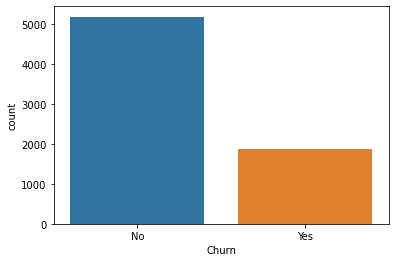

In [12]:
sns.countplot(x = "Churn", data = df)

In [13]:
gender_replace = {"Female" : 0, "Male": 1}
yes_no_replace = {"Yes" : 1, "No":0, "No phone service":0 , "No internet service":0 }

df["gender"] = df["gender"].map(gender_replace)

def binary_encode(features):
    for feature in features:
        df[feature] = df[feature].map(yes_no_replace)
binary_encode_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn","MultipleLines" ,"OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
binary_encode(binary_encode_columns)

In [14]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


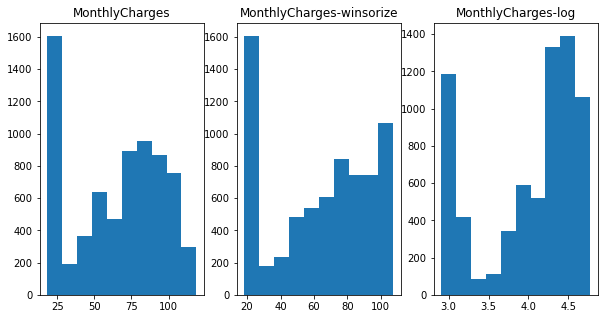

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(df['MonthlyCharges'])
plt.title("MonthlyCharges")
    
plt.subplot(1,3,2)
plt.hist(winsorize(df["MonthlyCharges"], (0,0.05)))
plt.title("MonthlyCharges-winsorize")

plt.subplot(1,3,3)
plt.hist(np.log(df['MonthlyCharges']))
plt.title("MonthlyCharges-log")
plt.show()

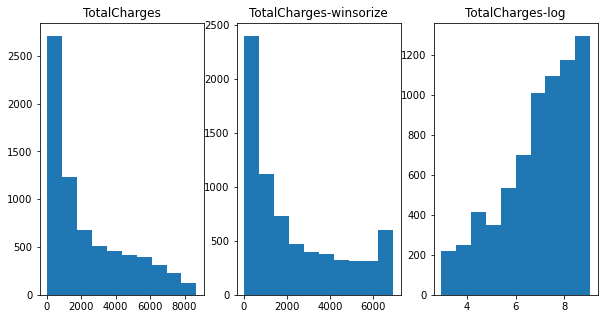

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(df['TotalCharges'])
plt.title("TotalCharges")
    
plt.subplot(1,3,2)
plt.hist(winsorize(df["TotalCharges"], (0,0.05)))
plt.title("TotalCharges-winsorize")

plt.subplot(1,3,3)
plt.hist(np.log(df['TotalCharges']))
plt.title("TotalCharges-log")
plt.show()

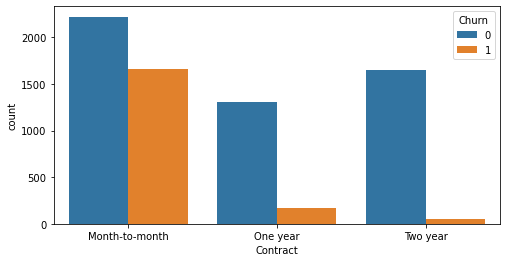

In [18]:
fig = plt.gcf()
fig.set_size_inches( 8, 4)
sns.countplot(df['Contract'],hue=df['Churn'])

In [19]:
df.groupby("Contract").mean()[["Churn"]]

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [20]:
ttest_ind(df[df.Contract == "Month-to-month"][["Churn"]],
          df[df.Contract == "Two year"][["Churn"]])

Ttest_indResult(statistic=array([32.3971795]), pvalue=array([4.2567532e-211]))

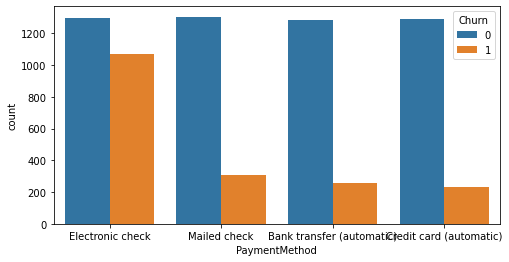

In [21]:
fig = plt.gcf()
fig.set_size_inches( 8, 4)
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

In [22]:
df.groupby("PaymentMethod").mean()[["Churn"]]

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [23]:
ttest_ind(df[df.PaymentMethod == "Electronic check"][["Churn"]],
          df[df.PaymentMethod == "Mailed check"][["Churn"]])

Ttest_indResult(statistic=array([17.68301468]), pvalue=array([2.03333653e-67]))

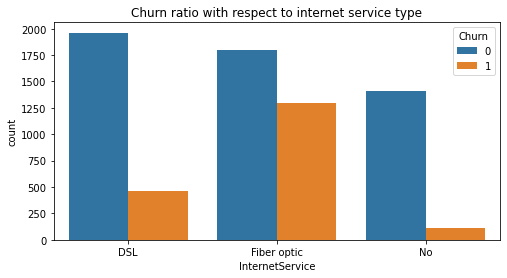

In [24]:
fig = plt.gcf()
plt.title('Churn ratio with respect to internet service type')
fig.set_size_inches( 8, 4)
sns.countplot(df['InternetService'],hue=df['Churn'])

In [25]:
ttest_ind(df[df.InternetService  == "DSL"][["Churn"]],
          df[df.InternetService  == "Fiber optic"][["Churn"]])

Ttest_indResult(statistic=array([-18.71090975]), pvalue=array([8.60253689e-76]))

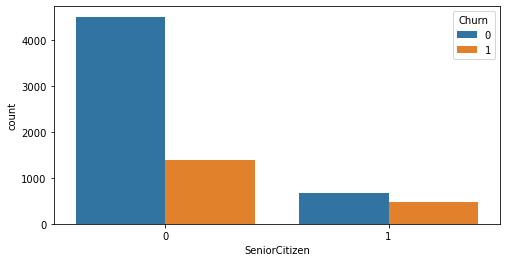

In [26]:
fig = plt.gcf()
fig.set_size_inches( 8, 4)
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])

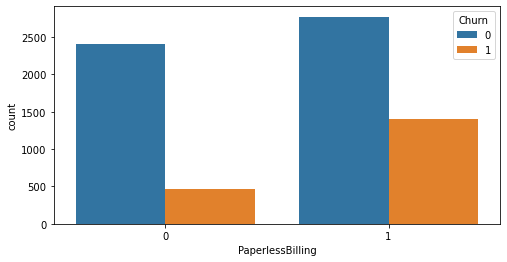

In [27]:
fig = plt.gcf()
fig.set_size_inches( 8, 4)
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

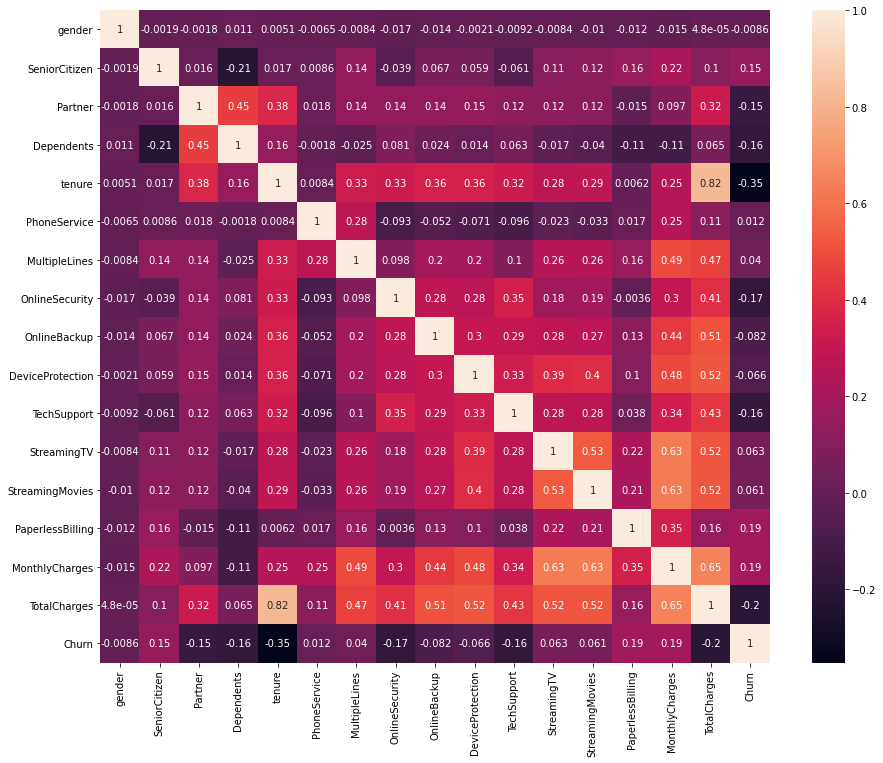

In [28]:
plt.figure(figsize=(15,12))
Corr=df[df.columns].corr()
sns.heatmap(Corr,annot=True)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
#df = pd.get_dummies(df)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Logistic Regression

In [32]:
y = df['Churn']
X = df[['TotalCharges','MonthlyCharges', 'tenure', 'gender']]

In [33]:
log_reg_ovr = LogisticRegression()
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X,y, test_size=0.20, random_state=111)

In [34]:
log_reg_ovr.fit(X_eğitim, y_eğitim)
egitim_dogruluk_ovr = log_reg_ovr.score(X_eğitim, y_eğitim)
test_dogruluk_ovr = log_reg_ovr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_ovr), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_ovr), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.78
Modelin test verisindeki doğruluğu   : 0.79


In [35]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)

egitim_dogruluk_mnm = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.78
Modelin test verisindeki doğruluğu   : 0.78


In [36]:
del X["gender"]
X["TotalCharges * MonthlyCharges "] = X["TotalCharges"] * X["MonthlyCharges"] 

In [37]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X,y, test_size=0.20, random_state=111)

In [38]:
log_reg_ovr = LogisticRegression()
log_reg_ovr.fit(X_test, y_test)

egitim_dogruluk_ovr = log_reg_ovr.score(X_eğitim, y_eğitim)
test_dogruluk_ovr = log_reg_ovr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_ovr), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_ovr), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.73
Modelin test verisindeki doğruluğu   : 0.76


In [39]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk_mnm = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.78
Modelin test verisindeki doğruluğu   : 0.78


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [41]:
X = df[["TotalCharges","MonthlyCharges","tenure","Contract", "PaymentMethod", "SeniorCitizen"]]
X["TotalCharges * MonthlyCharges "] = X["TotalCharges"] * X["MonthlyCharges"] 

In [42]:
X= pd.concat([X ,pd.get_dummies(X["Contract"])],axis=1)
del X["Contract"]

In [43]:
X= pd.concat([X ,pd.get_dummies(X["PaymentMethod"])],axis=1)
del X["PaymentMethod"]

In [44]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X,y, test_size=0.20, random_state=111)

In [45]:
log_reg_ovr = LogisticRegression()
log_reg_ovr.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
egitim_dogruluk_ovr = log_reg_ovr.score(X_eğitim, y_eğitim)
test_dogruluk_ovr = log_reg_ovr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_ovr), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_ovr), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.73
Modelin test verisindeki doğruluğu   : 0.76


In [47]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk_mnm = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.76
Modelin test verisindeki doğruluğu   : 0.76


In [49]:
X = df[["TotalCharges","MonthlyCharges","tenure","Contract", "PaymentMethod", "SeniorCitizen", "InternetService"]]

In [50]:
del X["tenure"]

In [51]:
X= pd.concat([X ,pd.get_dummies(X["InternetService"])],axis=1)
del X["InternetService"]

In [52]:
X= pd.concat([X ,pd.get_dummies(X["Contract"])],axis=1)
del X["Contract"]

In [53]:
X= pd.concat([X ,pd.get_dummies(X["PaymentMethod"])],axis=1)
del X["PaymentMethod"]

In [54]:
X["TotalCharges * MonthlyCharges "] = X["TotalCharges"] * X["MonthlyCharges"] 

In [55]:
X["Month-to-month *Electronic check "] = X["Month-to-month"] * X["Electronic check"]
X["Fiber optic * TotalCharges"]=X["Fiber optic"]* X["TotalCharges"]

In [56]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X,y, test_size=0.20, random_state=111)
log_reg_ovr = LogisticRegression()
log_reg_ovr.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
egitim_dogruluk_ovr = log_reg_ovr.score(X_eğitim, y_eğitim)
test_dogruluk_ovr = log_reg_ovr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_ovr), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_ovr), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.78
Modelin test verisindeki doğruluğu   : 0.79


In [58]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk_mnm = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.77
Modelin test verisindeki doğruluğu   : 0.76


In [59]:
X

,TotalCharges,MonthlyCharges,SeniorCitizen,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,TotalCharges * MonthlyCharges,Month-to-month *Electronic check,Fiber optic * TotalCharges
0,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0,891.0225,1,0.00
1,1889.50,56.95,0,1,0,0,0,1,0,0,0,0,1,107607.0250,0,0.00
2,108.15,53.85,0,1,0,0,1,0,0,0,0,0,1,5823.8775,0,0.00
3,1840.75,42.30,0,1,0,0,0,1,0,1,0,0,0,77863.7250,0,0.00
4,151.65,70.70,0,0,1,0,1,0,0,0,0,1,0,10721.6550,1,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,0,1,0,0,0,1,0,0,0,0,1,168794.4000,0,0.00
7039,7362.90,103.20,0,0,1,0,0,1,0,0,1,0,0,759851.2800,0,7362.90
7040,346.45,29.60,0,1,0,0,1,0,0,0,0,1,0,10254.9200,1,0.00
7041,306.60,74.40,1,0,1,0,1,0,0,0,0,0,1,22811.0400,0,306.60


In [60]:
tahmin_eğitim = log_reg_ovr.predict(X_eğitim)
tahmin_test = log_reg_ovr.predict(X_test)

In [61]:
tahmin_test_ihtimal = log_reg_ovr.predict_proba(X_test)[:,1]

In [62]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [63]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[3676  428]
 [ 831  699]]
Hata Matrisi (Test verileri)
------------------------------
[[952 118]
 [183 156]]


In [64]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 952
Doğru pozitif sayısı   : 156
Yanlış pozitif sayısı  : 118
Yanlış negatif sayısı  : 183


In [65]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg_ovr.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.7863733144073811
Hesaplanan doğruluk değeri      :  0.7863733144073811
accuracy_score() değeri         :  0.7863733144073811


In [66]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.5693430656934306
precision_score() değeri        :  0.5693430656934306


In [67]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.46017699115044247
recall_score() değeri        :  0.46017699115044247


In [68]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8897196261682243


In [69]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.5089722675367048
f1_score() değeri     :  0.5089722675367048


In [70]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1070
           1       0.57      0.46      0.51       339

    accuracy                           0.79      1409
   macro avg       0.70      0.67      0.69      1409
weighted avg       0.77      0.79      0.78      1409

f1_score() değeri        : 0.51
recall_score() değeri    : 0.46
precision_score() değeri : 0.57


Hassasiyet : [0.83876652 0.56934307]
Duyarlılık : [0.88971963 0.46017699]
F1 Skoru   : [0.86349206 0.50897227]


In [71]:
tahmin_test_ihtimal = log_reg_ovr.predict_proba(X_test)[:,1]

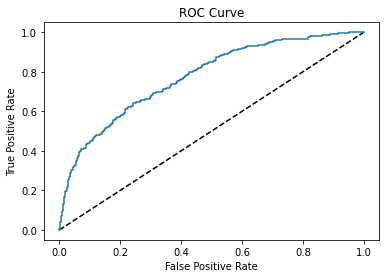

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [73]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.7736994458688281


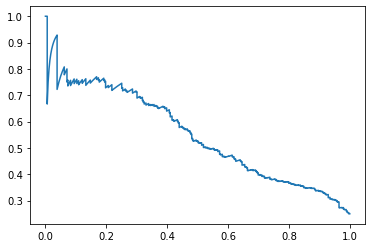

In [74]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [75]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.48175172349216905
Hata Oranı                  :  0.21362668559261888


sınıf dengesizliği

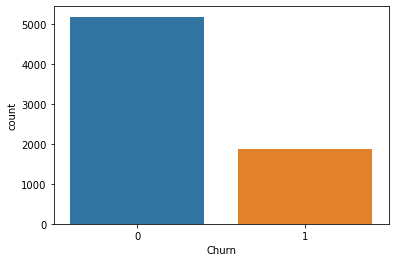

In [76]:
sns.countplot(df.Churn)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [78]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None


In [79]:
df = pd.get_dummies(df)

In [80]:
X = df.drop('Churn', axis=1)
y = df['Churn']
model_olustur(X,y)

Modelin doğruluk değeri :  0.8090844570617459
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634

Test veri kümesi
              precision    recall  f1-score   support

           0       0.85      0.91      0.87      1035
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [81]:
from sklearn.utils import resample
ayrılmayan = df[df.Churn == 0]
ayrılan = df[df.Churn == 1]

ayrılan_artırılmış = resample(ayrılan,
                                     replace = True,
                                     n_samples = len(ayrılmayan),
                                     random_state = 111)

artırılmıs_df = pd.concat([ayrılmayan, ayrılan_artırılmış])
artırılmıs_df.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [82]:
X = artırılmıs_df.drop('Churn', axis=1)
y = artırılmıs_df['Churn']
model_olustur(X,y)

Modelin doğruluk değeri :  0.7574879227053141
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      4139
           1       0.75      0.80      0.77      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278

Test veri kümesi
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1035
           1       0.74      0.79      0.76      1035

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [83]:
ayrılmayan = df[df.Churn == 0]
ayrılan = df[df.Churn == 1]

ayrılan_azaltılmış = resample(ayrılmayan,
                                     replace = True,
                                     n_samples = len(ayrılan),
                                     random_state = 111)

azaltılmış_df = pd.concat([ayrılan, ayrılan_azaltılmış])
azaltılmış_df.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [84]:
X = azaltılmış_df.drop('Churn', axis=1)
y = azaltılmış_df['Churn']
model_olustur(X,y)

Modelin doğruluk değeri :  0.7513368983957219
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1495
           1       0.74      0.81      0.77      1495

    accuracy                           0.76      2990
   macro avg       0.76      0.76      0.76      2990
weighted avg       0.76      0.76      0.76      2990

Test veri kümesi
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       374
           1       0.74      0.76      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



In [85]:
from imblearn.over_sampling import SMOTE
y = df.Churn
X = df.drop('Churn', axis=1)

sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_sample(X, y)
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.8246376811594203
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4139
           1       0.82      0.83      0.83      4139

    accuracy                           0.83      8278
   macro avg       0.83      0.83      0.83      8278
weighted avg       0.83      0.83      0.83      8278

Test veri kümesi
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1035
           1       0.82      0.83      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [86]:
from imblearn.over_sampling import ADASYN
y = df.Churn
X = df.drop('Churn', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.822936660268714
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4139
           1       0.82      0.84      0.83      4196

    accuracy                           0.83      8335
   macro avg       0.83      0.83      0.83      8335
weighted avg       0.83      0.83      0.83      8335

Test veri kümesi
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.82      0.83      0.82      1049

    accuracy                           0.82      2084
   macro avg       0.82      0.82      0.82      2084
weighted avg       0.82      0.82      0.82      2084

